<a href="https://colab.research.google.com/github/dedemasutti/data-science/blob/main/data_Science_Mercado_Imobili%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Projeto de Ciencia de Dados mercado imobiliário

###Imports

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [7]:
dados = pd.read_csv('/content/aluguel.csv', sep = ';')


### Pré processamento e Analise exploratória dos dados

In [8]:
print(dados.dtypes)

Unnamed: 0.1      int64
Unnamed: 0        int64
Tipo             object
Bairro           object
Quartos           int64
Vagas             int64
Suites            int64
Area              int64
Valor           float64
Condominio      float64
IPTU            float64
dtype: object


In [9]:
dados.head() # Exibe as primeiras linhas do DataFrame

,Unnamed: 0.1,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,4,4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [10]:
#Identifica as colunas com o nome "Unnamed":
unnamed_columns = [col for col in dados.columns if 'Unnamed' in col]


In [11]:
# Remove as colunas desejadas utilizando o metodo drop
dados.drop(unnamed_columns, axis=1, inplace=True)


In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [13]:
dados.head() # Exibe o DataFrame sem as colunas Unnamed

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [14]:
dados.describe() # Exibe estatísticas descritivas do DataFrame

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,22580.000000,22580.000000,22580.000000,22580.000000,2.257100e+04,2.076500e+04,15795.000000
mean,2.509699,1.284677,0.941895,136.410053,4.985730e+03,1.642732e+03,798.890282
std,1.103543,13.093263,1.139380,145.370426,3.245147e+04,4.563660e+04,4485.679038
min,0.000000,0.000000,0.000000,10.000000,1.000000e+02,1.000000e+00,1.000000
25%,2.000000,0.000000,0.000000,64.000000,1.500000e+03,5.720000e+02,96.000000
50%,2.000000,1.000000,1.000000,90.000000,2.700000e+03,9.400000e+02,220.000000
75%,3.000000,2.000000,1.000000,150.000000,5.300000e+03,1.600000e+03,525.000000
max,32.000000,1960.000000,14.000000,3000.000000,4.500000e+06,6.552570e+06,450625.000000


In [16]:
dados.isnull().sum() # valores faltantes

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [40]:
#Será criada uma lista com todos os tipos
list(dados['Tipo'].drop_duplicates())

['Quitinete', 'Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila']

In [41]:
dados['Suites'].value_counts()

1    6582
0    5557
2    1561
3     751
4     692
5     176
6      26
7       1
Name: Suites, dtype: int64

## Visualização dos dados

####Matplotilb

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 2000x1000 with 0 Axes>

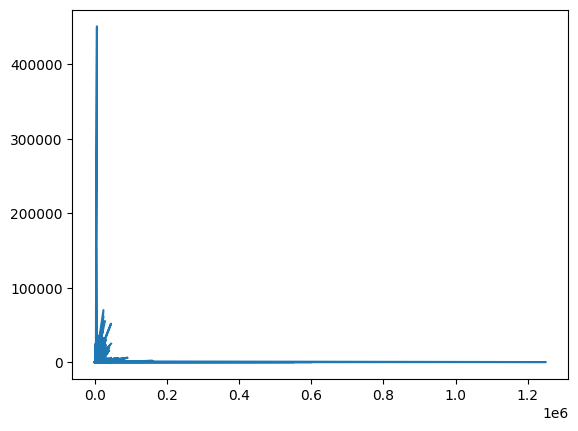

<Figure size 2000x1000 with 0 Axes>

In [17]:
plt.plot(dados['Valor'],dados['IPTU'])
plt.figure(figsize = (20,10))

###Seaborn

<Axes: xlabel='Valor', ylabel='IPTU'>

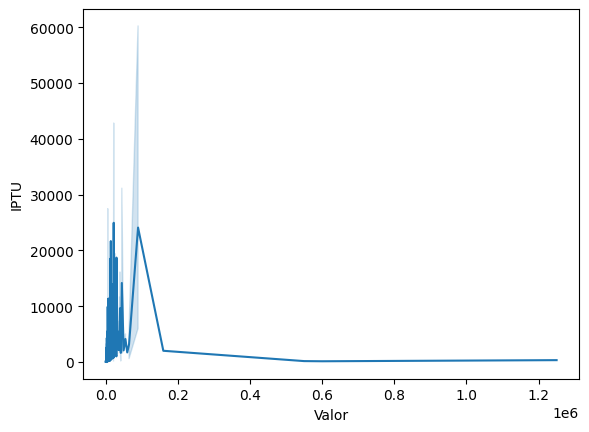

In [18]:
sns.lineplot(x=dados['Valor'],y= dados['IPTU'])

<Axes: xlabel='Valor', ylabel='IPTU'>

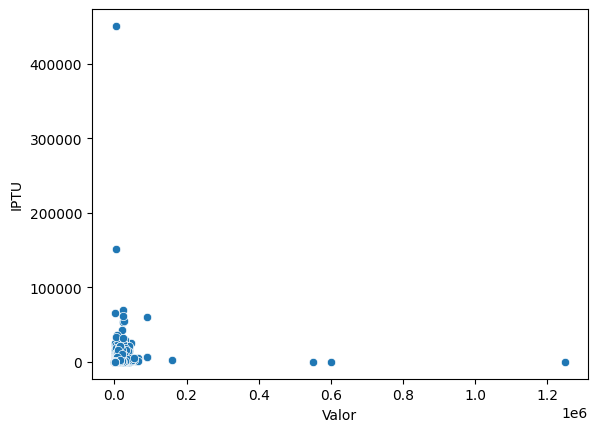

In [57]:
sns.scatterplot(x=dados['Valor'], y=dados['IPTU'])

<Axes: xlabel='Valor'>

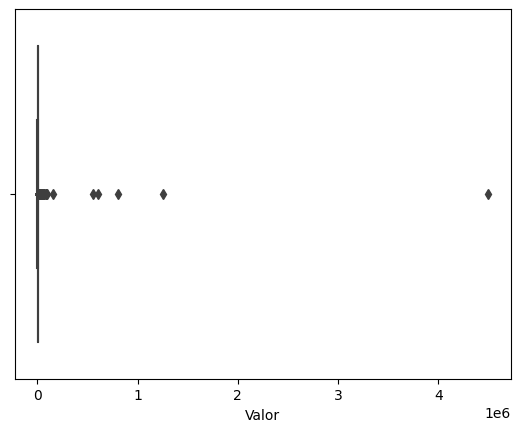

In [20]:
sns.boxplot(x=dados['Valor'])

<Axes: >

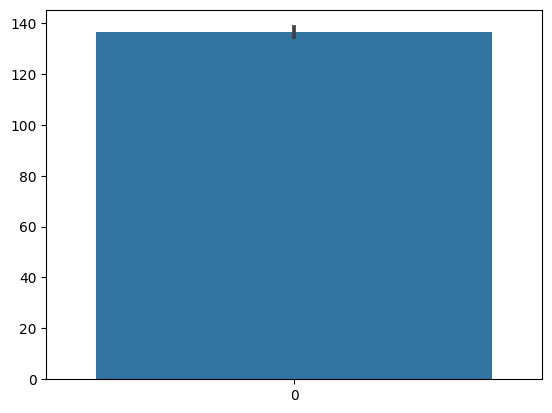

In [21]:
sns.barplot(dados['Area'])